# Marketing Mix
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Management Science
Erstellt von Sebastian Knall am 02.03.2022

#### Das vorliegene Notebook bezieht sich auf Folie 3 der Einführung im Fach Management Science - Marketing Mix.

#### Es soll einen einfachen Einstieg in eine mögliche Lösung des Problems bieten.
#### Hierbei wurde als Solver "PulP" benutzt. Die PulP Biblothek ist frei mit "pip install pulp" erältlich.

#### In der vorliegenden möglichen Lösung wurde bewusst ein sehr einfacher Code verwendet. Er soll als Einstieg und Bindeglied zwischen Vorlesung und Python-Programmierung dienen. 

#### Hierbei wurden sämtliche Parameter direkt und einzeln, eins zu eins in Code übertragen.

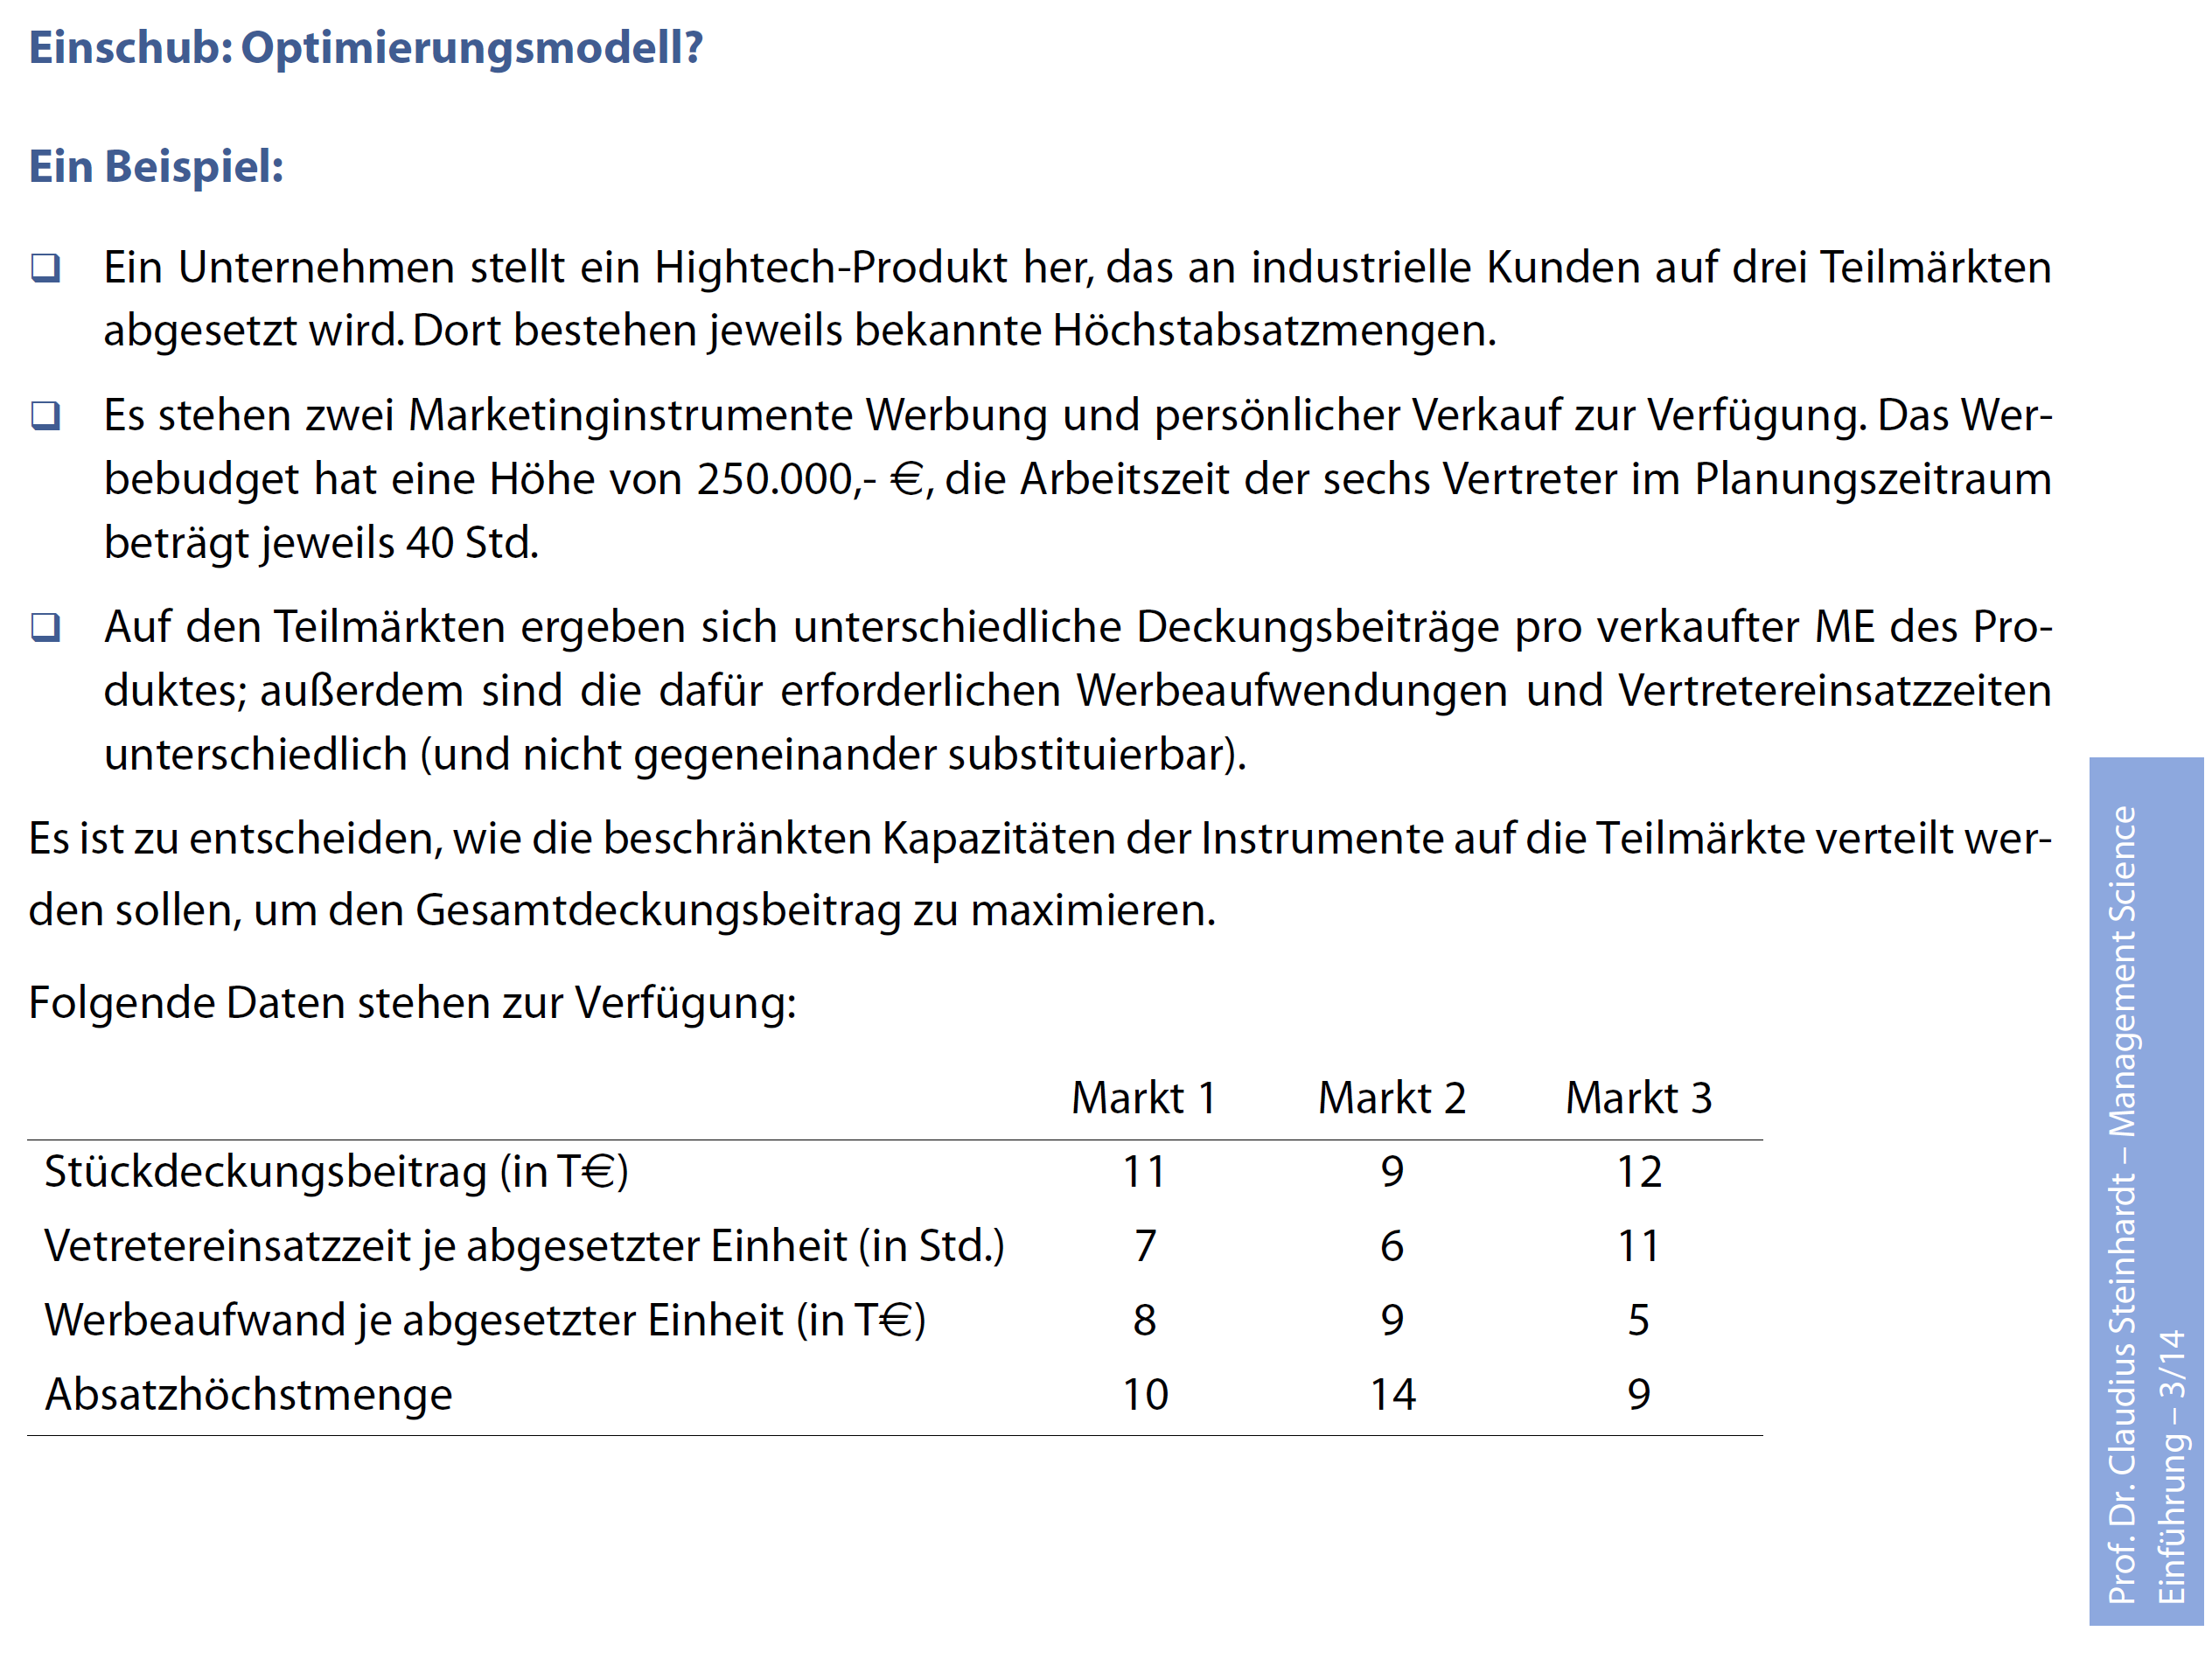

In [1]:
# Importieren der benötigten Bibliotheken
import pulp
from pulp import *

In [2]:
# Erstellen eines neuen PulP-Modells und festlegen ob es ein Maximierungs- oder Minimierungsproblem sein soll.
prob = LpProblem("MarketingMix", LpMaximize)

In [3]:
# Erstellen der Variablen
## PulP Variablen bestehen aus vier Parametern: Name, Untere Grenze, Obere Grenze und diskret oder linear
### Ist kein Wert für ein Parameter angegeben, so nimmt PulP Standartwerte vor.

x1 = LpVariable("AbsatzmengeMarkt1", 0, None, LpInteger)
x2 = LpVariable("AbsatzmengeMarkt2", 0, None, LpInteger)
x3 = LpVariable("AbsatzmengeMarkt3", 0, None, LpInteger)

In [4]:
# Festlegen der Zielfunktion 
prob += 11 * x1 + 9  *x2 + 12 * x3, "Gesamterloes"

In [5]:
# Unter der Nebenbedingung 1: Vertreterarbeitszeitkapazität - 6 Vertreter á 40 Stunden = 240 Stunden
prob += 7 * x1 + 6 * x2 + 11 * x3 <= 240, "NB01"

In [6]:
# Unter der Nebenbedingung 2: Budgetrestriktion
prob += 8 * x1 + 9 * x2 + 5 * x3 <= 250, "NB02"

In [7]:
# Unter der Nebenbedingung 3: Absatzhöchstmenge Markt 1
prob += x1 <= 10, "NB03"

In [8]:
# Unter der Nebenbedingung 4: Absatzhöchstmenge Markt 2
prob += x2 <= 14, "NB04"

In [9]:
# Unter der Nebenbedingung 5: Absatzhöchstmenge Markt 3
prob += x3 <= 9, "NB05"

In [10]:
# Unter der Nebenbedingung 6: Nichtnegativität
# Durch Erstellen der Variablen schon erfüllt

In [11]:
#Problem in eine .lp Datei speichern
prob.writeLP("MarketingMix.lp")

[AbsatzmengeMarkt1, AbsatzmengeMarkt2, AbsatzmengeMarkt3]

In [12]:
# Modell lösen
prob.solve()

1

In [13]:
# Augeben des Status
print("Status:", LpStatus[prob.status])

Status: Optimal


In [14]:
# Ausgeben der Mengen für die jeweilige Variablen
for v in prob.variables():
    print(v.name, "=", v.varValue)
        
# Ausgeben Gesamtgewinn
print("Gesammtgewinn: ", value(prob.objective))

AbsatzmengeMarkt1 = 9
AbsatzmengeMarkt2 = 13
AbsatzmengeMarkt3 = 9
Gesammtgewinn:  324
